<a href="https://colab.research.google.com/github/junyong1111/KMU-2022/blob/main/Capstone_YOLO_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Mar  8 14:05:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
if not os.path.exists('usr/local/cuda/include/cudnn.h'):
    !tar -xzvf drive/MyDrive/Kobot/YOLO/darknet/cuDNN/cudnn-11.1-linux-x64-v8.0.5.39.tgz -C /usr/local/
    !chmod a+r /usr/local/cuda/include/cudnn.h

!cat /usr/local/cuda/include/cudnn.h

cuda/include/cudnn.h
cuda/include/cudnn_adv_infer.h
cuda/include/cudnn_adv_train.h
cuda/include/cudnn_backend.h
cuda/include/cudnn_cnn_infer.h
cuda/include/cudnn_cnn_train.h
cuda/include/cudnn_ops_infer.h
cuda/include/cudnn_ops_train.h
cuda/include/cudnn_version.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.8
cuda/lib64/libcudnn.so.8.0.5
cuda/lib64/libcudnn_adv_infer.so
cuda/lib64/libcudnn_adv_infer.so.8
cuda/lib64/libcudnn_adv_infer.so.8.0.5
cuda/lib64/libcudnn_adv_train.so
cuda/lib64/libcudnn_adv_train.so.8
cuda/lib64/libcudnn_adv_train.so.8.0.5
cuda/lib64/libcudnn_cnn_infer.so
cuda/lib64/libcudnn_cnn_infer.so.8
cuda/lib64/libcudnn_cnn_infer.so.8.0.5
cuda/lib64/libcudnn_cnn_train.so
cuda/lib64/libcudnn_cnn_train.so.8
cuda/lib64/libcudnn_cnn_train.so.8.0.5
cuda/lib64/libcudnn_ops_infer.so
cuda/lib64/libcudnn_ops_infer.so.8
cuda/lib64/libcudnn_ops_infer.so.8.0.5
cuda/lib64/libcudnn_ops_train.so
cuda/lib64/libcudnn_ops_train.so.8
cuda/lib64/libcudnn_o

In [ ]:
import os
if not os.path.exists('darknet'):
    os.makedirs('darknet')
%cd darknet
%ls
!ls -la '/content/drive/MyDrive/Kobot/YOLO/darknet/bin/darknet'
!cp -r /content/drive/MyDrive/Kobot/YOLO/darknet/bin/darknet ./darknet
!chmod +x ./darknet
#YOLO data 가져오기
!cp -r /content/drive/MyDrive/Kobot/YOLO/darknet/weights .
!cp -r /content/drive/MyDrive/Kobot/YOLO/darknet/cfg .
!cp -ar /content/drive/MyDrive/Kobot/YOLO/darknet/data .

# Custom data가 있는 폴더 복사
!cp -r /content/drive/MyDrive/Capstone/재료 .
!cp -r /content/drive/MyDrive/Capstone/backup .
%ls

/content/darknet
-rw------- 1 root root 6845664 Feb 15 15:12 /content/drive/MyDrive/Kobot/YOLO/darknet/bin/darknet
재료/  backup/  cfg/  darknet*  data/  weights/


In [ ]:
%cd /content/darknet
%ls

/content/darknet
재료/  backup/  cfg/  darknet*  data/  weights/


In [ ]:
#download files

def imShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline

    img = cv2.imread(path)
    height , width = img.shape[:2]
    resized_img = cv2.resize(img, (3*width, 3*height),interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18,10)
    plt.axis("off")
    #plt.rcParams['figure.figsize'] = [10,5]
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.show()

def upload():
    from google.colab import files
    uploaded = files.upload()
    for name, data in uploaded.items():
        with open(name, "wb") as f:
            f.write(data)
            print("saved file", name)
def download(path):
    from google.colab import files
    files.download(path)

#### YOLO_COLAB_IMAGE_PATH 수정
#### image_path + cur_path 수정

In [ ]:
import os

current_path = os.path.abspath(os.curdir)
#print(current_path) 현재 경로 확인 
COLAB_DARKNET_PATH = '/content/drive/MyDrive/Kobot/YOLO/darknet'
# Darknet 경로

YOLO_COLAB_IMAGE_PATH = current_path + '/재료/'
YOLO_COLAB_FORMAT_PATH = current_path + '/재료/'
# Darknet 학습할 이미지가 있는 경로

class_count = 0 # 클래스 개수
test_percentage  = 0.2 #test 비율
paths = []

with open(YOLO_COLAB_FORMAT_PATH + '/' + 'classes.names', 'w') as names, \
     open(YOLO_COLAB_FORMAT_PATH + '/' + 'classes.txt', 'r') as txt:
     for line in txt:
         names.write(line)
         #print(line)
         class_count += 1
     print("[classes.names] is created")
 # 로컬 데이터에서 라벨링 된 이미지들의 calsses.txt를 읽어 확장명 names로 바꿔주고 class 개수를 추가해주는 함수

with open(YOLO_COLAB_FORMAT_PATH + '/' + 'custom_data.data', 'w') as data:
    data.write('classes = ' + str(class_count) + '\n')
    data.write('train = ' + YOLO_COLAB_IMAGE_PATH  + 'train.txt' + '\n')
    data.write('valid = ' + YOLO_COLAB_IMAGE_PATH  + 'test.txt' + '\n')
    data.write('names = ' + YOLO_COLAB_IMAGE_PATH + 'classes.names' + '\n')
    data.write('backup = backup')
    print("[custom_data.data] is created")
# 로컬 데이터에 custom_data.data 포멧의 입력정보를 입력하는 코드

os.chdir(YOLO_COLAB_IMAGE_PATH)
for current_dir, dirs, files in os.walk('.'):
    for f in files:
        if (f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png') ):
            image_path = current_path + '/재료/' + f
            paths.append(image_path + '\n')

## 로컬 데이터에 저장된  images 폴더를 순회하면서 확장자가 jpg, jpeg, png 라면 경롤

paths_test = paths[:int(len(paths) * test_percentage)]

paths = paths[int(len(paths) * test_percentage) :]

with open(YOLO_COLAB_FORMAT_PATH + '/' + 'train.txt', 'w') as train_txt:
    for path in paths :
        train_txt.write(path)
    print("[train_txt] is created")

with open(YOLO_COLAB_FORMAT_PATH + '/' + 'test.txt', 'w') as test_txt:
    for path in paths_test :
        test_txt.write(path)
    print("[test_txt] is created")    
    


[classes.names] is created
[custom_data.data] is created
[train_txt] is created
[test_txt] is created


In [ ]:
%cd /content/darknet

/content/darknet


In [ ]:
!./darknet detector train 재료/custom_data.data cfg/custom-train-yolo.cfg weights/darknet53.conv.74 -dont_show 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.917987), count: 6, class_loss = 0.006354, iou_loss = 0.037572, total_loss = 0.043925 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.895072), count: 4, class_loss = 0.000002, iou_loss = 0.028390, total_loss = 0.028391 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 2059468, rewritten_bbox = 0.023890 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.900715), count: 4, class_loss = 0.000026, iou_loss = 0.027364, total_loss = 0.027390 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.877742), count: 1, class_loss = 0.000001, iou_loss = 0.009990, total_loss = 0.009991 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 

#### Colab 끊김 방지 코드 
function ClickConnect(){ console.log("Working"); document.querySelector("colab-toolbar-button#connect").click() }setInterval(ClickConnect, 1800000)


In [ ]:
if os.path.exists('./backup'):
    !cp -r ./backup "/content/drive/MyDrive/Capstone/backup"
    !cp chart.png "/content/drive/MyDrive/Capstone//backup"

if not os.path.exists('./backup'):
    os.makedirs('./backup')
    !cp -r "/content/drive/MyDrive/Kobot/darknet/backup" ./backup

In [ ]:
## 학습을 이어서 하고싶으면
# !./darknet detector train recipe_data/custom_data.data cfg/custom-train-yolo.cfg backup/custom-train-yolo_last_weights -dont_show 

In [ ]:
!./darknet detector map recipe_data/custom_data.data recipe_data/capstone-train-yolo.cfg backup/backup/custom-train-yolo_10000.weights -dont_show 

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Couldn't open file: recipe_data/custom_data.data


In [ ]:
!./darknet detector test recipe_data/custom_data.data recipe_data/capstone-train-yolo.cfg backup/backup/custom-train-yolo_final.weights data/5.jpg

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 10

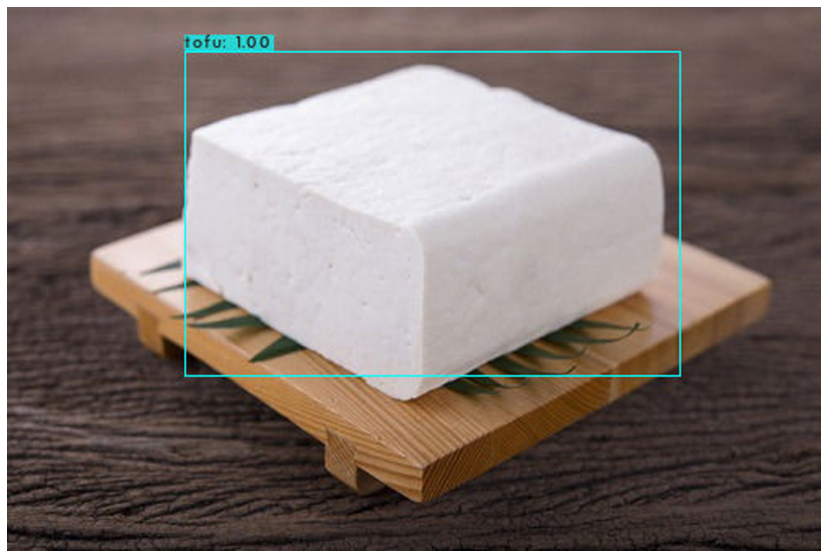

In [ ]:
imShow("predictions.jpg")